<a href="https://colab.research.google.com/github/22-poojashree/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

x_train,x_test=x_train/255.0,x_test/255.0

#RGB scale is 255each
#changing channel using /255.0 --> changing to grey scale
# x_train-->train_images
# y_train-->train_labels
#x_test-->test_images
#y_test-->test_labels

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

'automobile'

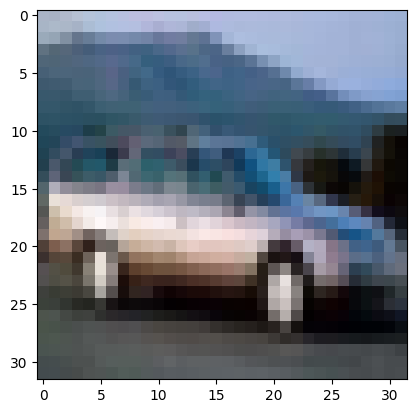

In [ ]:
plt.imshow(x_train[4])

class_name[y_train[4][0]]

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
# in convolution layer: 32 is no.of filters used; (3,3) is size of the filter matrix; relu is for non-linearity ;
#input_shape-->making or informing size of the input(32*32); that 3 in input_shape is rgb channel is optional

model.add(layers.MaxPooling2D((2,2)))
# in pooling layer: (2,2) the matrix is reduced to 2*2 matrix

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))  # the activation function in optional default is 'softmax' for activation func

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.0973 - loss: 2.4578 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0968 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0981 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0976 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1006 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3026
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0984 - loss: 2.3026

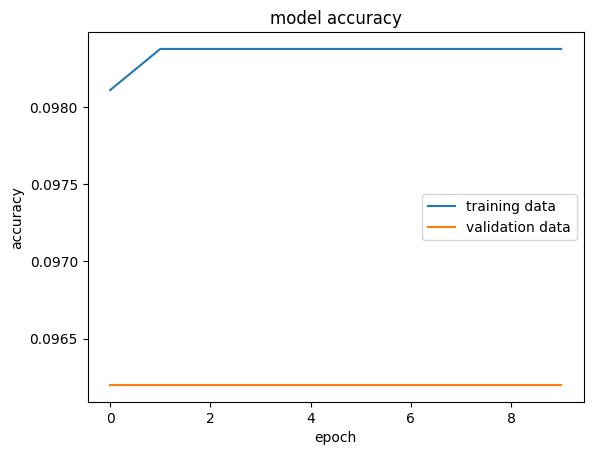

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc='center right')

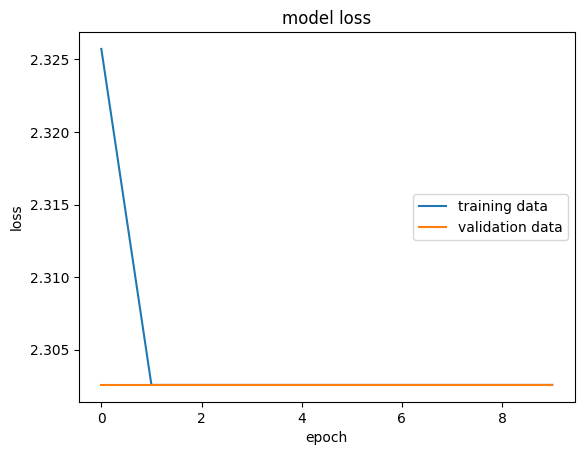

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc='center right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[-0.46103844, -1.3261771 , -0.5369622 , ..., -1.1026666 ,
        -1.380909  , -0.35879156],
       [-0.6169454 , -1.8245367 , -0.71982783, ..., -1.4850677 ,
        -1.8163368 , -0.5762838 ],
       [-0.5504061 , -1.4866366 , -0.6015916 , ..., -1.2132202 ,
        -1.5604209 , -0.46874568],
       ...,
       [-0.29640386, -1.007095  , -0.37115207, ..., -0.7979214 ,
        -1.1041547 , -0.23896167],
       [-0.49050575, -1.4839996 , -0.6008466 , ..., -1.2166723 ,
        -1.609907  , -0.3893147 ],
       [-0.41438615, -1.1239346 , -0.47306168, ..., -0.9285559 ,
        -1.1599895 , -0.34145325]], dtype=float32)

In [ ]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1[2014]

np.int64(6)

In [ ]:
y_test[2014]

array([8], dtype=uint8)

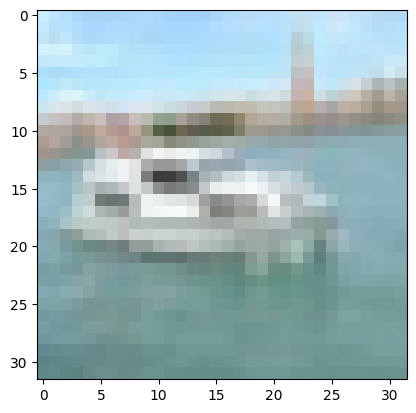

In [ ]:
plt.imshow(x_test[2014])

Text(0.5, 1.0, 'Y_test: [1],y_pred:6')

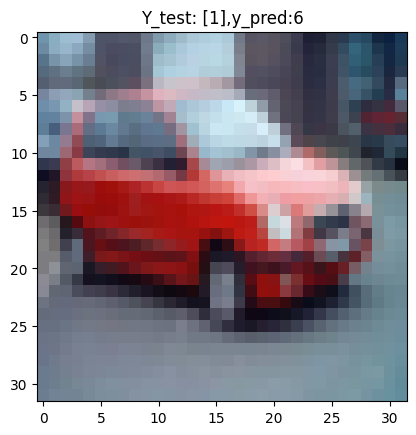

In [ ]:
plt.imshow(x_test[604])
plt.title(f"Y_test: {y_test[604]},y_pred:{y_pred1[604]}")

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred1,y_test))

0.0984


In [ ]:
tf.keras.models.save_model(model,'model.hdf5')